# Import airbnb data

## Libraries and settings

In [88]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# API credentials for Kaggle
with open('kaggle.json') as f:
    data = json.load(f)

os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

from kaggle.api.kaggle_api_extended import KaggleApi

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data


## Use Kaggle Web API to download airbnb data for Geneva

In [89]:
# Initialize API
api = KaggleApi()
api.authenticate()

# Download file
api.dataset_download_file('prayankkul/airbnb-geneva-switzerland-29-jun-2021', path='.', file_name='listings_1.csv')

Dataset URL: https://www.kaggle.com/datasets/prayankkul/airbnb-geneva-switzerland-29-jun-2021


True

In [90]:
# Read zip file data to pandas data frame
# path to the zip file
zip_file_path = '/workspaces/project_arm_airbnb/data/listings_1.csv.zip'

# Entpacken der ZIP-Datei
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/workspaces/project_arm_airbnb/data')

# Lesen der entpackten CSV-Datei in ein Pandas DataFrame
csv_file_path = '/workspaces/project_arm_airbnb/data/listings_1.csv'
df_orig = pd.read_csv(csv_file_path)

# Anzeigen des DataFrames
df_orig.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42515,https://www.airbnb.com/rooms/42515,20210629025133,2021-06-29,Geneva center - Hosting females,<b>The space</b><br />This is a private room w...,NaN,https://a0.muscache.com/pictures/10640277/ff1d...,185647,https://www.airbnb.com/users/show/185647,...,4.78,4.79,4.40,NaN,f,1,0,1,0,1.20
1,44959,https://www.airbnb.com/rooms/44959,20210629025133,2021-06-29,Perfect Cozy Bedroom Close to Lake & Transport,Perfect for the single traveler whether it be ...,The apartment is situated in the heart of Gene...,https://a0.muscache.com/pictures/3340619/139f4...,198343,https://www.airbnb.com/users/show/198343,...,5.00,4.72,4.57,NaN,f,1,0,1,0,0.67
2,194110,https://www.airbnb.com/rooms/194110,20210629025133,2021-06-29,Central apartment by the lake,Design apartment conveniently located in the h...,NaN,https://a0.muscache.com/pictures/1252014/0ee91...,942248,https://www.airbnb.com/users/show/942248,...,4.49,4.85,4.49,NaN,f,1,1,0,0,0.67
3,276025,https://www.airbnb.com/rooms/276025,20210629025133,2021-06-29,Lovely flat by Geneva lake,This cozy flat is located in a very pleasant v...,NaN,https://a0.muscache.com/pictures/4156456/d3aed...,1442438,https://www.airbnb.com/users/show/1442438,...,4.87,4.75,4.68,NaN,t,1,1,0,0,1.15
4,325986,https://www.airbnb.com/rooms/325986,20210629025133,2021-06-29,"Stylish loft in Pâquis, next to UN",Hello traveler!<br />Pâquis is one of the most...,NaN,https://a0.muscache.com/pictures/21414234/10b5...,1667362,https://www.airbnb.com/users/show/1667362,...,4.93,4.76,4.65,NaN,f,1,1,0,0,1.01


In [91]:
# delete zip file
if os.path.exists(zip_file_path):
    os.remove(zip_file_path)
    print(f"{zip_file_path} wurde gelöscht.")
else:
    print(f"{zip_file_path} existiert nicht.")

/workspaces/project_arm_airbnb/data/listings_1.csv.zip wurde gelöscht.


# Data preparation

In [92]:
# create a subset of the data with the columns we are interested in for the analysis
# select columns: 'id', 'neighbourhood_cleansed', 'latitude', 'longitude','property_type', 'room_type', 'price', 'accomodates', 'bathrooms_text', 'amenities', 'review_scores_rating', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count'
df = df_orig[['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'price', 'accommodates', 'bathrooms_text', 'amenities', 'review_scores_rating', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count']]
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,$72.00,1,1.5 baths,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,$68.00,1,1.5 shared baths,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,$135.00,4,1 bath,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,$65.00,5,1 bath,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,$150.00,2,1.5 baths,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [93]:
# print shape of the data
print(f"Dataframe shape: {df.shape}")

# print number of columns and rows
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Dataframe shape: (2069, 14)
Number of rows: 2069
Number of columns: 14


### Check for hotels in data

In [94]:
# unique values of the property_type column
property_types = df['property_type'].unique()
print(property_types)

# count the number of listings for each property type
property_type_counts = df['property_type'].value_counts()
print(property_type_counts)

['Private room in apartment' 'Entire apartment' 'Private room in loft'
 'Private room in condominium' 'Entire loft' 'Private room in villa'
 'Entire condominium' 'Private room in house' 'Entire house'
 'Entire villa' 'Private room in bed and breakfast' 'Entire guesthouse'
 'Entire place' 'Entire bungalow' 'Shared room in loft'
 'Entire serviced apartment' 'Shared room in apartment'
 'Entire guest suite' 'Room in hotel' 'Entire bed and breakfast'
 'Private room in nature lodge' 'Private room in townhouse'
 'Private room in casa particular' 'Room in boutique hotel'
 'Entire townhouse' 'Tiny house' 'Shared room'
 'Private room in guesthouse' 'Yurt' 'Private room in hostel' 'Boat'
 'Private room in chalet' 'Farm stay' 'Shared room in condominium'
 'Room in aparthotel' 'Private room in guest suite' 'Camper/RV'
 'Private room in tiny house' 'Houseboat' 'Bus'
 'Private room in serviced apartment' 'Private room' 'Entire cottage']
property_type
Entire apartment                      1084
Private

In [95]:
# Only include property types of private indivduals and exclude professional / commercial property types 
# exclude property types with hotel or hostel in the name
df = df[~df['property_type'].str.contains('Hotel|Hostel|hotel|hostel')]
df['property_type'].value_counts()

property_type
Entire apartment                      1084
Private room in apartment              435
Entire serviced apartment              111
Entire condominium                      89
Private room in house                   71
Entire house                            41
Private room in condominium             31
Entire loft                             19
Private room in bed and breakfast       19
Private room in villa                   16
Private room in townhouse               12
Shared room in apartment                11
Private room in casa particular         10
Entire villa                            10
Private room in loft                     9
Entire guesthouse                        9
Entire townhouse                         7
Boat                                     6
Entire guest suite                       5
Private room in serviced apartment       5
Tiny house                               3
Farm stay                                2
Private room in nature lodge            

In [96]:
# print shape of the data
print(f"Dataframe shape: {df.shape}")

# print number of columns and rows
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataframe shape: (2024, 14)
Number of rows: 2024
Number of columns: 14


### Conversion of variables 'price' and 'bathrooms' to floats

In [97]:
# convert price to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5 baths,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5 shared baths,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1 bath,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1 bath,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5 baths,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [98]:
# drop in bathrooms_text all text that starts with b or s
df['bathrooms_text'] = df['bathrooms_text'].str.replace(r'[^0-9.]+', '', regex=True)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [99]:
# convert bathrooms_text to float and set 1 for NaN and missing values
df['bathrooms_text'] = df['bathrooms_text'].replace('', np.nan).fillna(1).astype(float)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [100]:
# rename bathrooms_text to bathrooms
df.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


### Conversion of variable 'instant_bookable' to binary (0/1)

In [101]:
# convert vriable instant_bookable to dummy variable with 1 for True and 0 for False
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1


### New variable 'count_amenities'

In [102]:
# create a new variable count_amenities based on the number of amenities
df['count_amenities'] = df['amenities'].str.split(',').str.len()
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,count_amenities
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,22
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,51
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,26
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,48
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,26


### New variables based on attractions and public transport in Geneva

In [103]:
# import the museums data from museum.json
with open('/workspaces/project_arm_airbnb/data_maps/museum.json') as f:
    data = json.load(f)

# convert the data to a pandas DataFrame and convert tags in columns
dfm = pd.json_normalize(data)

# simply the data frame and df has no missing values
dfm = dfm[['id', 'lat', 'lon', 'tags.name', 'tags.tourism']]
dfm.rename(columns={'tags.name': 'name', 'tags.tourism': 'category'}, inplace=True)
dfm.head()

,id,lat,lon,name,category
0,701851300,46.233972,6.055721,Globe de la Science et de l'Innovation,museum
1,981690477,46.184291,6.139151,Musée de Carouge,museum
2,983366077,46.198282,6.108982,Musée des EAN,museum
3,1768216261,46.220829,6.152126,Musée d'histoire des sciences,museum
4,2021513198,46.198828,6.137523,MAMCO,museum


In [104]:
# create a new variable dist_attraction based on the distance to the nearest attraction
# import the attractions data from attraction.json
with open('/workspaces/project_arm_airbnb/data_maps/attraction.json') as f:
    data = json.load(f)

# convert the data to a pandas DataFrame and convert tags in columns
dfa = pd.json_normalize(data)

# simply the data frame and exlude missing values and NaN
dfa = dfa[['id', 'lat', 'lon', 'tags.name', 'tags.tourism']]
dfa.rename(columns={'tags.name': 'name', 'tags.tourism': 'category'}, inplace=True)

# drop missing values
dfa = dfa.dropna()
dfa.head()

# add the museums to the attractions data frame
df_ta = pd.concat([dfm, dfa], ignore_index=True)

# print shape of the data
print(f"Dataframe shape: {df_ta.shape}")
df_ta.head()



Dataframe shape: (52, 5)


,id,lat,lon,name,category
0,701851300,46.233972,6.055721,Globe de la Science et de l'Innovation,museum
1,981690477,46.184291,6.139151,Musée de Carouge,museum
2,983366077,46.198282,6.108982,Musée des EAN,museum
3,1768216261,46.220829,6.152126,Musée d'histoire des sciences,museum
4,2021513198,46.198828,6.137523,MAMCO,museum


In [105]:
# check for duplicates
duplicates = df_ta.duplicated(subset=['name']).sum()
print(f"Number of duplicates: {duplicates}")

# drop duplicates
df_ta = df_ta.drop_duplicates(subset=['name'])
print(f"Dataframe shape: {df_ta.shape}")


Number of duplicates: 1
Dataframe shape: (51, 5)


In [106]:
# import the public transport data from oev.db



### Summary statistics and missing values

In [107]:
# describe the data
# print the summary statistics of the data
print(df.describe())


                 id     latitude    longitude        price  accommodates  \
count  2.024000e+03  2024.000000  2024.000000  2024.000000   2024.000000   
mean   2.992165e+07    46.206284     6.143972   126.394269      2.657115   
std    1.529775e+07     0.020470     0.027914   134.113890      1.507280   
min    4.251500e+04    46.138820     5.973220    10.000000      1.000000   
25%    1.723789e+07    46.195377     6.132483    70.000000      2.000000   
50%    3.307640e+07    46.204440     6.144230    99.000000      2.000000   
75%    4.306113e+07    46.212587     6.155158   134.000000      4.000000   
max    5.069686e+07    46.346590     6.269240  3000.000000     11.000000   

         bathrooms  review_scores_rating  review_scores_location  \
count  2024.000000           1526.000000             1504.000000   
mean      1.201334              4.615577                4.782021   
std       0.497997              0.744851                0.439713   
min       0.000000              0.000000   

In [108]:
# quantiles of variable price, bathrooms, accomodates to identify potential outliers
quantiles = df[['price', 'bathrooms', 'accommodates']].quantile([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])
print(quantiles)


       price  bathrooms  accommodates
0.05   45.00        1.0           1.0
0.10   54.00        1.0           1.0
0.25   70.00        1.0           2.0
0.50   99.00        1.0           2.0
0.75  134.00        1.0           4.0
0.90  200.00        1.5           4.0
0.95  288.85        2.0           6.0


In [109]:
# create a subset of the data based on the 0.90 quantiles of the variables price
df = df.loc[df['price'] <= 200]
df.shape

(1827, 15)

In [110]:
# shape of the data
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().values.sum()}")
print(f"Unique values: {df.nunique()}")
print(f"Data types: {df.dtypes}")


Rows: 1827
Columns: 15
Missing values: 885
Unique values: id                                1827
neighbourhood_cleansed              41
latitude                          1536
longitude                         1585
property_type                       36
room_type                            3
price                              159
accommodates                        10
bathrooms                            8
amenities                         1695
review_scores_rating               103
review_scores_location              78
instant_bookable                     2
calculated_host_listings_count      19
count_amenities                     61
dtype: int64
Data types: id                                  int64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
price                             float64
accommodates                        in

In [111]:
# check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

review_scores_rating      434
review_scores_location    451
dtype: int64

In [112]:
# replace missing values in review_scores_rating and review_scores_location with the mean
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())

# check for missing values or NaN values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [113]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Number of duplicates: 0


In [114]:
# shape of the data
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().values.sum()}")
print(f"Unique values: {df.nunique()}")

Rows: 1827
Columns: 15
Missing values: 0
Unique values: id                                1827
neighbourhood_cleansed              41
latitude                          1536
longitude                         1585
property_type                       36
room_type                            3
price                              159
accommodates                        10
bathrooms                            8
amenities                         1695
review_scores_rating               104
review_scores_location              79
instant_bookable                     2
calculated_host_listings_count      19
count_amenities                     61
dtype: int64


In [115]:
# print summary statistics of the data
print(df.describe())


                 id     latitude    longitude        price  accommodates  \
count  1.827000e+03  1827.000000  1827.000000  1827.000000   1827.000000   
mean   3.012846e+07    46.205879     6.143244    98.022441      2.451013   
std    1.525528e+07     0.020240     0.027701    38.253937      1.248080   
min    4.251500e+04    46.138820     5.973220    10.000000      1.000000   
25%    1.732462e+07    46.195025     6.132175    70.000000      2.000000   
50%    3.342409e+07    46.204440     6.143340    94.000000      2.000000   
75%    4.320765e+07    46.212455     6.154755   120.000000      3.000000   
max    5.069686e+07    46.346590     6.266060   200.000000     11.000000   

         bathrooms  review_scores_rating  review_scores_location  \
count  1827.000000           1827.000000             1827.000000   
mean      1.136836              4.623022                4.775560   
std       0.359346              0.626507                0.392474   
min       0.000000              0.000000   

### Data storage in SQLite

In [116]:
# store data in sqlite database
import sqlite3
import fnmatch

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# create a connection to the database
conn = sqlite3.connect('/workspaces/project_arm_airbnb/data/listings.db')

# Create cursor object to execute SQL commands
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

# store the data in the database
df.to_sql('listings', conn, if_exists='replace', index=False)


listings_1_database.db
oev.db
listings.db


1827

### Query the SQL-table

In [117]:
# query the data from the database
query = "SELECT * FROM listings"
df2 = pd.read_sql(query, conn)
df2.head()


,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,count_amenities
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,22
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,51
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,26
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,48
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,26


In [118]:
# Query the data with price greater than 150

cursor.execute('''SELECT *
                FROM listings
                WHERE price > 150''')

df2 = pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])    
df2

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,count_amenities
0,338682,Commune de Genève,46.206820,6.155260,Entire apartment,Entire home/apt,157.0,2,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.800000,4.85000,1,1,26
1,530979,Commune de Genève,46.216990,6.127360,Private room in apartment,Private room,197.0,2,1.0,"[""Wifi"", ""Elevator"", ""Long term stays allowed""...",4.700000,4.63000,0,1,8
2,721025,Commune de Genève,46.198880,6.156260,Entire apartment,Entire home/apt,199.0,3,1.0,"[""Ethernet connection"", ""Extra pillows and bla...",4.820000,4.78000,0,1,39
3,1167323,Commune de Genève,46.213570,6.150700,Entire apartment,Entire home/apt,165.0,4,1.0,"[""Wifi"", ""Dedicated workspace"", ""Hair dryer"", ...",5.000000,5.00000,0,1,13
4,1236785,Commune de Genève,46.219850,6.138560,Entire apartment,Entire home/apt,180.0,3,1.0,"[""Wifi"", ""Elevator"", ""Cable TV"", ""Long term st...",4.570000,4.82000,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,49850401,Veyrier,46.184240,6.165810,Entire house,Entire home/apt,200.0,2,2.0,"[""Dedicated workspace"", ""Cooking basics"", ""Hai...",4.623022,4.77556,0,2,13
166,49992022,Commune de Genève,46.221830,6.133270,Entire condominium,Entire home/apt,200.0,5,2.5,"[""Ethernet connection"", ""Dedicated workspace: ...",4.623022,4.77556,0,1,49
167,50111464,Chêne-Bougeries,46.202610,6.199080,Entire apartment,Entire home/apt,159.0,4,2.0,"[""Wifi"", ""Hair dryer"", ""Carbon monoxide alarm""...",5.000000,4.00000,0,1,16
168,50163771,Vernier,46.214080,6.083000,Entire apartment,Entire home/apt,164.0,7,1.5,"[""Wifi"", ""Dedicated workspace"", ""Hair dryer"", ...",4.623022,4.77556,1,1,12


### Close db connection

In [119]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


# EDA

## Univariate non-graphical EDA

### Summary statistics

In [120]:
# summary statistics of numeric variables
df.describe()

,id,latitude,longitude,price,accommodates,bathrooms,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,count_amenities
count,1.827000e+03,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,3.012846e+07,46.205879,6.143244,98.022441,2.451013,1.136836,4.623022,4.775560,0.353038,10.571976,21.426382
std,1.525528e+07,0.020240,0.027701,38.253937,1.248080,0.359346,0.626507,0.392474,0.478045,25.536899,10.166598
min,4.251500e+04,46.138820,5.973220,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.732462e+07,46.195025,6.132175,70.000000,2.000000,1.000000,4.623022,4.775560,0.000000,1.000000,14.000000
50%,3.342409e+07,46.204440,6.143340,94.000000,2.000000,1.000000,4.670000,4.780000,0.000000,1.000000,20.000000
75%,4.320765e+07,46.212455,6.154755,120.000000,3.000000,1.000000,4.930000,5.000000,1.000000,3.000000,28.000000
max,5.069686e+07,46.346590,6.266060,200.000000,11.000000,6.000000,5.000000,5.000000,1.000000,102.000000,69.000000


### Statistical measures (min, max, std, mean, median, count) for price and accomodates

In [121]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Accommodates
print('Accomodates:',
      'Count:', round(df.accommodates.count(), 1),
      'Min:', round(df.accommodates.min(), 1),
      'Max:', round(df.accommodates.max(), 1),
      'Mean:', round(df.accommodates.mean(), 1),
      'Median:', round(df.accommodates.median(), 1),
      'Std:', round(df.accommodates.std(), 1))

Price: Count: 1827 Min: 10.0 Max: 200.0 Mean: 98.0 Median: 94.0 Std: 38.3
Accomodates: Count: 1827 Min: 1 Max: 11 Mean: 2.5 Median: 2.0 Std: 1.2


### Skewness

In [122]:
df[['price','accommodates']].skew()

price           0.665791
accommodates    1.441539
dtype: float64

### Kurtosis

In [123]:
df[['price','accommodates']].kurtosis()

price           0.043673
accommodates    3.103312
dtype: float64

## Multivariate non-graphical EDA

### Neighborhood

In [124]:
# print the number of listings in each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève     1251
Carouge                 92
Vernier                 51
Grand-Saconnex          48
Lancy                   46
Thônex                  42
Chêne-Bougeries         34
Meyrin                  34
Versoix                 31
Onex                    21
Pregny-Chambésy         17
Veyrier                 16
Cologny                 15
Plan-les-Ouates         14
Chêne-Bourg             13
Bellevue                11
Collonge-Bellerive       9
Bernex                   8
Puplinge                 8
Bardonnex                8
Genthod                  7
Corsier                  6
Satigny                  4
Meinier                  4
Collex-Bossy             4
Confignon                4
Soral                    4
Anières                  3
Avully                   3
Troinex                  3
Dardagny                 2
Presinge                 2
Hermance                 2
Choulex                  2
Chancy                   2
Vandoeuvres              1
Perly

In [125]:
# list the 5 most common neighborhoods and summarize the others as 'Other'
top_5_neighborhoods = neighborhood_counts.head(5).index
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighborhoods else 'Other')
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève    1251
Other                 339
Carouge                92
Vernier                51
Grand-Saconnex         48
Lancy                  46
Name: count, dtype: int64


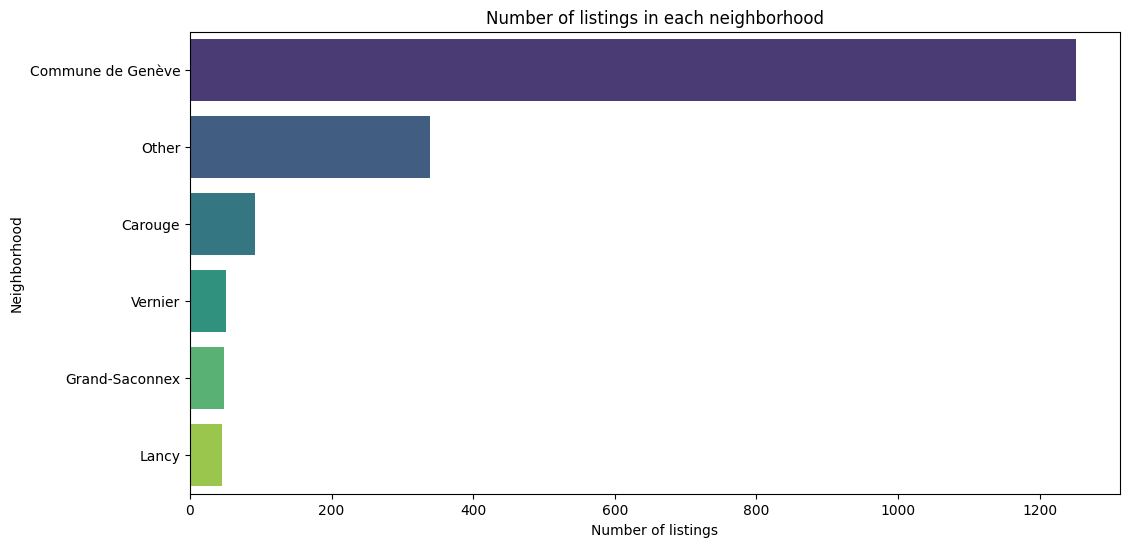

In [126]:
# plot the numnber of the neighbourhood_cleansed column and sort by the number of listings, create a category 'Others' that sums up the listings of neighbourhoods with less than 50 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='neighbourhood_cleansed', order=neighborhood_counts.index, palette='viridis')
plt.title('Number of listings in each neighborhood')
plt.xlabel('Number of listings')
plt.ylabel('Neighborhood')
plt.show()

### Property types

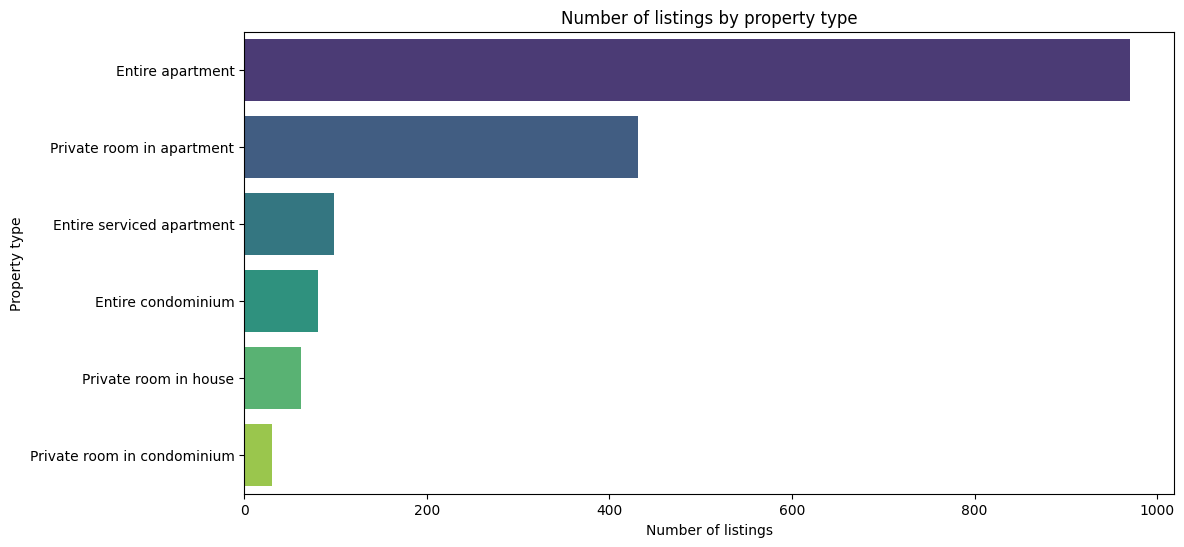

In [127]:
# plot the number of listings depending on the property type and only include property types with more than 25 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts()[df['property_type'].value_counts() > 25].index, palette='viridis')
plt.title('Number of listings by property type')
plt.xlabel('Number of listings')
plt.ylabel('Property type')
plt.show()

### Room types

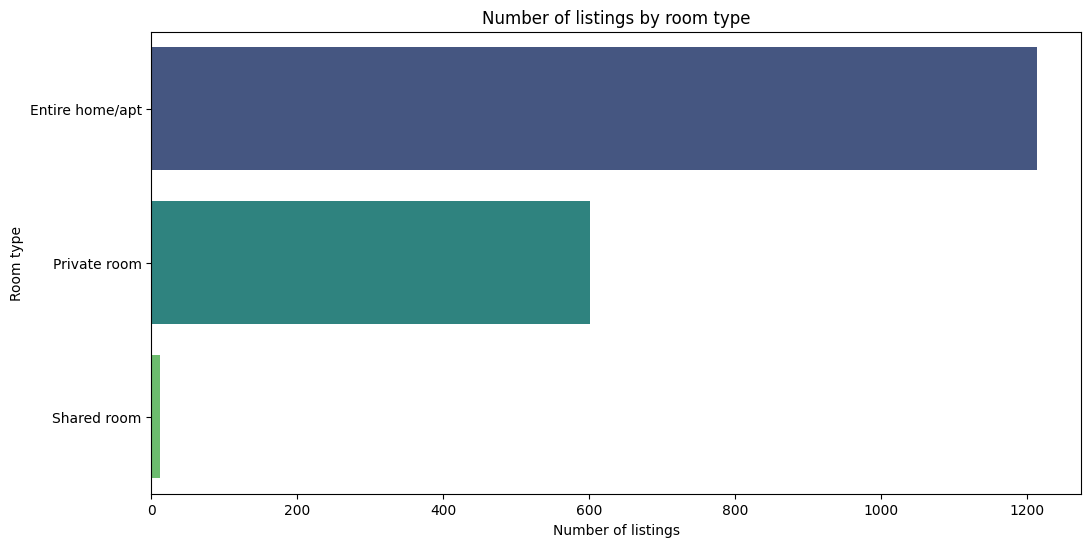

In [128]:
# plot the number of listings depending on the room type and order it by count 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index, palette='viridis')
plt.title('Number of listings by room type')
plt.xlabel('Number of listings')
plt.ylabel('Room type')
plt.show()


### Histogram of 'price'

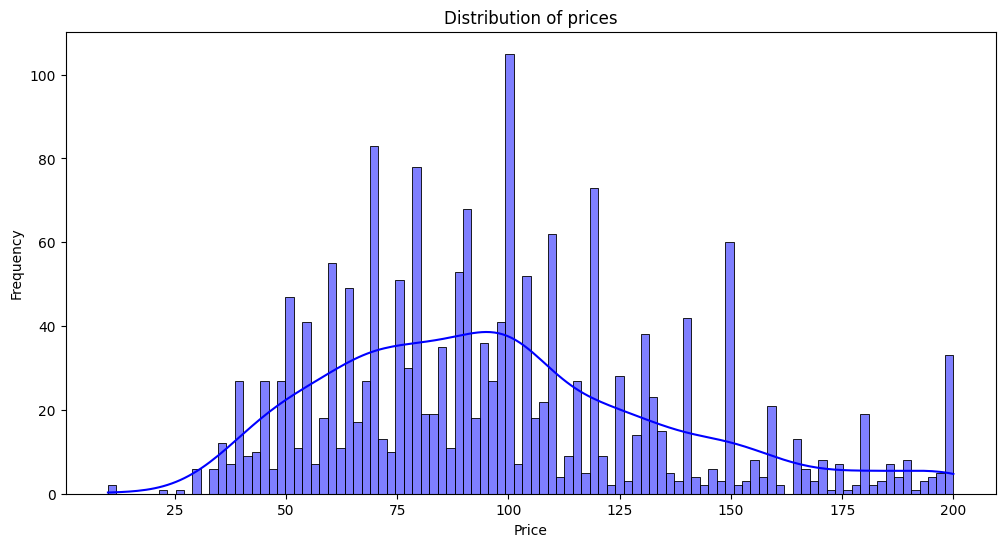

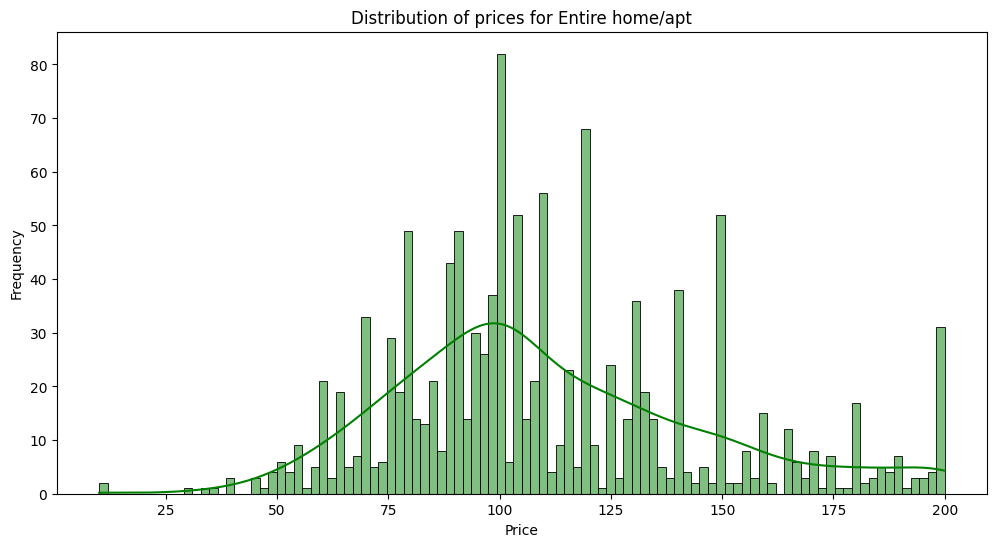

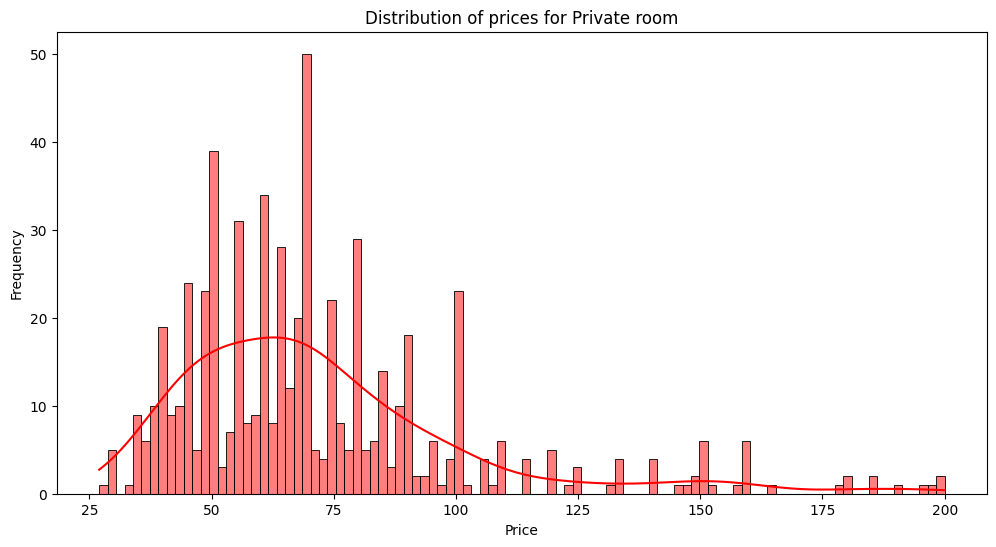

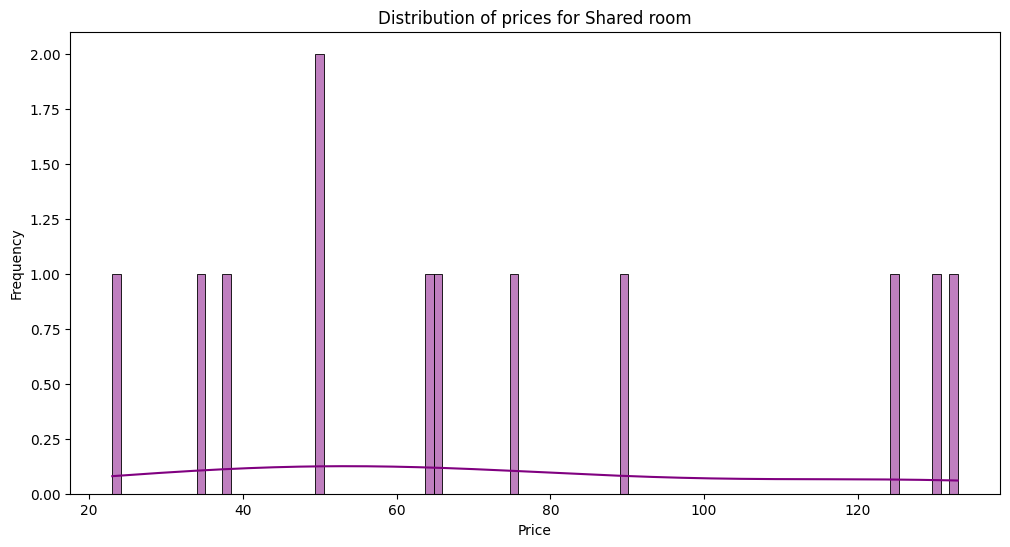

In [129]:
# plot the distribution of the price column
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, color='blue', kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Entire home/apt'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Entire home/apt']['price'], bins=100, color='green', kde=True)
plt.title('Distribution of prices for Entire home/apt')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Private room'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Private room']['price'], bins=100, color='red', kde=True)
plt.title('Distribution of prices for Private room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Shared room'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Shared room']['price'], bins=100, color='purple', kde=True)
plt.title('Distribution of prices for Shared room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Histogram of 'accomodates'

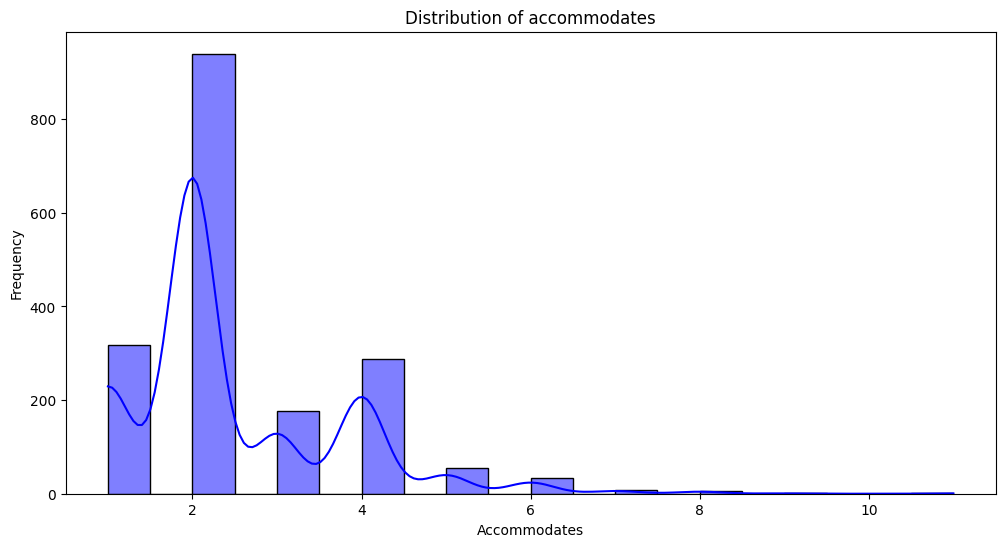

In [130]:
# create a histogram of the number of people that can be accommodated in the listings
plt.figure(figsize=(12, 6))
sns.histplot(df['accommodates'], bins=20, color='blue', kde=True)
plt.title('Distribution of accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()